#### Classifying back injuries. In this problem, you will use nearest neighbor to classify patients’ back injuries based on measurements of the shape and orientation of their pelvis and spine. The data set spine-data.txt contains information from 310 patients. For each patient, there are: six numeric features (the x) and a label (the y): ’NO’ (normal), ’DH’ (herniated disk), or ’SL’ (spondilolysthesis). We will divide this data into a training set with 250 points and a separate test set of 60 points

- Make sure you have the data set spine-data.txt. You can load it into Python using the following

```
import numpy as np
# load data 0 ='NO', 1='DH', 2 = 'SL'
labels = [b'NO',b'DH','b'SL']
data = np.loadtext('spine-data.txt', converters={6: lambda s: labels.index(s)})
```

- do 80/20 split for train/test data or train=250 points and test=60 points

- code nearest neighbor classifier for $\ell_1$ and $\ell_2$ defined below 

$$\ell_2 = \sqrt{\sum^{d}_{i=1}(x_i - x^{\prime}_i)^{2}}$$

$$\ell_1 = \sum^{d}_{i=1}|x_i - x^{\prime}_i|$$

(a) what are error rates for $\ell_1$ and $\ell_2$?

(b) what is the confusion matrix for $\ell_1$ and $\ell_2$?



In [30]:
## import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
## initialize labels for data
data_labels = ['NO','DH','SL']

## load data from spine-data.txt and relabel the 7th column (NO:1, DH:1, SL:2)          
data = np.loadtxt('spine-data.txt', converters={6: lambda s: data_labels.index(s)})

## split data into features and labels
features = data[:, :-1]
labels = data[:, -1]

## split data into training and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1925, random_state=42)


250
15
12
33


In [78]:
## define l1 distance function
def l1_distance(x, x_prime):
    l1_dist = np.sum(np.abs(x - x_prime))
    return l1_dist


## define l2 distance function
def l2_distance(x, x_prime):
    l2_dist = np.sqrt(np.sum((x - x_prime) ** 2))
    return l2_dist

## define nn_classifier function
def nn_classifier(features_train, features_test, labels_train,distance_function):
    """
    1. loop through each test point in the features_test list
    2. get the distance between the test point and each training point for every training point
    3. find the index of the training point with the smallest distance
    4. use the index to get the label of the training point
    5. append the label to the predictions list
    6. return the predictions list
    """
    predictions = []
    for test_point in features_test:
        distances = [distance_function(test_point, train_point) for train_point in features_train]
        nearest_neighbor_index = np.argmin(distances)
        predictions.append(labels_train[nearest_neighbor_index])
    predictions = np.array(predictions)
    return predictions

## define error rate function
def get_error_rate(predictions, labels):
    correct = sum(p == l for p, l in zip(predictions, labels))
    accuracy = correct / len(labels)
    er = 1 - accuracy
    return er

## define confusion matrix function
def get_confusion_matrix(predictions, labels):
    cm = confusion_matrix(predictions,labels)
    return cm

## visualize confusion matrix function
def plot_confusion_matrix(l1_er, cm1, l2_er, cm2, labels):
    fig, ax = plt.subplots(1,2,figsize=(10, 8),sharey=True)
    ax = ax.flatten()
    sns.heatmap(cm1, annot=True, fmt='d', cmap=sns.color_palette("rocket", as_cmap=True), xticklabels=labels, yticklabels=labels, ax=ax[0])
    ax[0].set_title(f'L1 Distance Confusion Matrix\nError Rate: {l1_er:.3f}')
    sns.heatmap(cm2, annot=True, fmt='d', cmap=sns.color_palette("rocket", as_cmap=True), xticklabels=labels, yticklabels=labels, ax=ax[1])
    ax[1].set_title(f'L2 Distance Confusion Matrix\nError Rate: {l2_er:.3f}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()


L1 Distance Classifier Error Rate: 0.18333333333333335
L1 Distance Classifier Confusion Matrix:
 [[13  5  4]
 [ 2  7  0]
 [ 0  0 29]]
L2 Distance Classifier Error Rate: 0.1166666666666667
L2 Distance Classifier Confusion Matrix:
 [[13  2  2]
 [ 2 10  1]
 [ 0  0 30]]


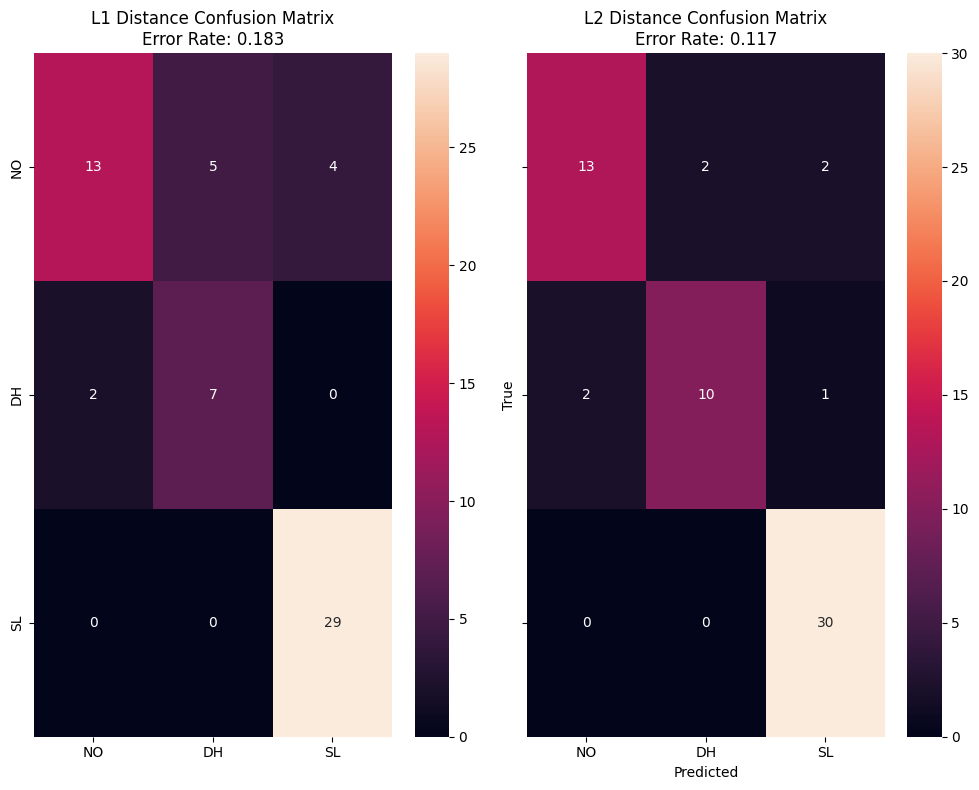

In [ ]:
## evaluate l1 distance classifier: get error rate and confusion matrix
predictions_l1 = nn_classifier(features_train, features_test, labels_train, l1_distance)
error_rate_l1 = get_error_rate(predictions_l1, labels_test)
cm_l1 = get_confusion_matrix(predictions_l1, labels_test)

## evaluate l2 distance classifier: get error rate and confusion matrix
predictions_l2 = nn_classifier(features_train, features_test, labels_train, l2_distance)
error_rate_l2 = get_error_rate(predictions_l2, labels_test)
cm_l2 = get_confusion_matrix(predictions_l2, labels_test)

## visualize confusion matrices
plot_confusion_matrix(error_rate_l1, cm_l1, error_rate_l2, cm_l2, data_labels)


#### Question 10
Cross-validation for nearest neighbor classification. The wine.data data set is described in detail at:
https://archive.ics.uci.edu/ml/datasets/wine
This small data set has 178 observations. Each data point x consists of 13 features that capture visual
and chemical properties of a bottle of wine. The label y ∈ {1, 2, 3} indicates which of three wineries the
bottle came from. The goal is to use the data to learn a classifier that can predict y from x.
Suppose we use the entire data set of 178 points as the training set for 1-NN classification with Eu-
clidean distance. We would like to estimate the quality of this classifier.

- (a) Use leave-one-out cross-validation (LOOCV) to estimate the accuracy of the classifier and also to
estimate the 3 × 3 confusion matrix.
- (b) Estimate the accuracy of the 1-NN classifier using k-fold cross-validation using 20 different choices
of k that are fairly well spread out across the range 2 to 100. Plot these estimates: put k on the
horizontal axis and accuracy estimate on the vertical axis.
- (c) The various features in this data set have different ranges.Perhaps it would be better to normalize
them so as to equalize their contributions to the distance function. There are many ways to do this;
one option is to linearly rescale each coordinate so that the values lie in [0, 1](i.e. the minimum value
on that coordinate maps to 0 and the maximum value maps to 1). Do this, and then re-estimate
the accuracy and confusion matrix using LOOCV. Did the normalization help performance

In [97]:
## import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [98]:
## read wine.DATA file
df = pd.read_csv('wine.data', header=None)

## name columns
df.columns = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280/OD315 of Diluted Wines', 'Proline']

## define wine labels
wine_labels = ['Class 1', 'Class 2', 'Class 3']

## split data into features and labels
features = df.iloc[:, 1:].values
labels = df.iloc[:, 0].values

Accuracy: 0.770


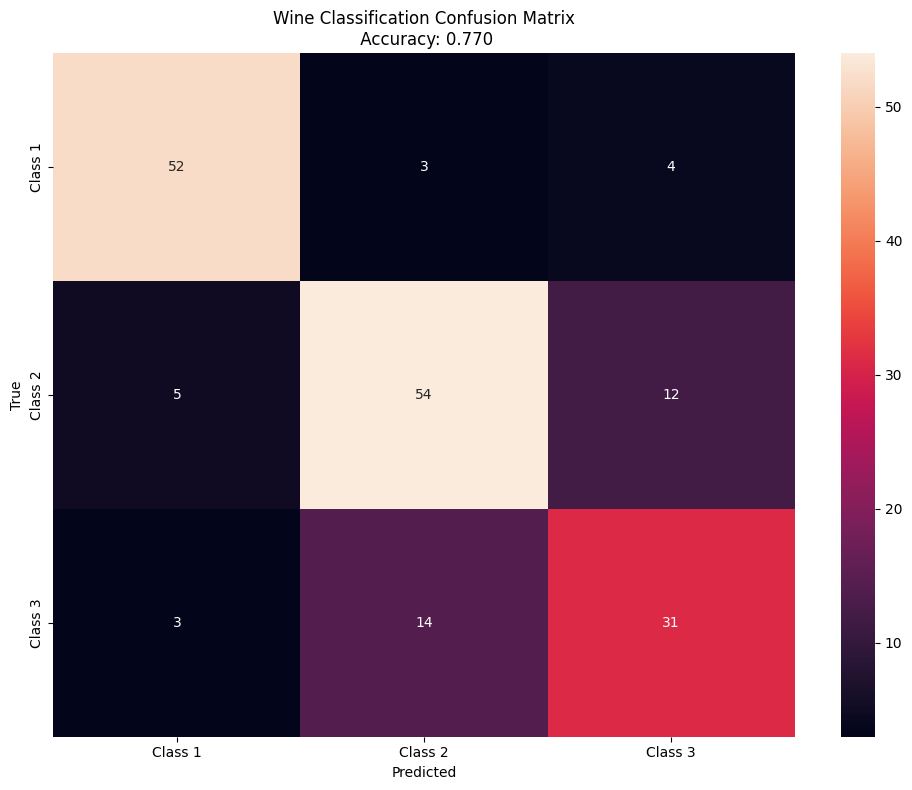

In [99]:
## part (a)
## initalize 1-NN classifier
NN_1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='euclidean')

## initalize LOOCV
loocv = sklearn.model_selection.LeaveOneOut()

## get predictions from cross-validation
predictions = sklearn.model_selection.cross_val_predict(NN_1, features, labels, cv=loocv)

## estimate accuracy
accuracy = sklearn.metrics.accuracy_score(labels, predictions)
print(f'Accuracy: {accuracy:.3f}')
## get confusion matrix
cm = sklearn.metrics.confusion_matrix(labels, predictions)
## visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette("rocket", as_cmap=True), xticklabels=wine_labels, yticklabels=wine_labels)
plt.title(f'Wine Classification Confusion Matrix\n Accuracy: {accuracy:.3f}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


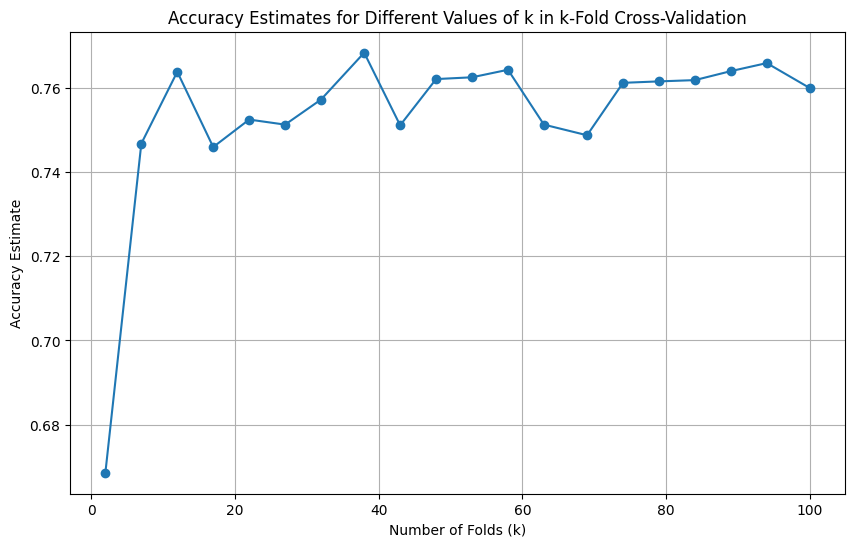

In [100]:
## initialize k values such that we have  20 k's spread out across the range 2 to 100
k_values = np.linspace(2, 100, 20, dtype=int)

# initialize accuracy list
accuracies = []

# Perform k-fold cross-validation for each k
for k in k_values:
    cv = sklearn.model_selection.KFold(n_splits=k, shuffle=True, random_state=42)
    scores = sklearn.model_selection.cross_val_score(NN_1, features, labels, cv=cv)
    accuracies.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Accuracy Estimate')
plt.title('Accuracy Estimates for Different Values of k in k-Fold Cross-Validation')
plt.grid(True)
plt.show()

Accuracy: 0.770


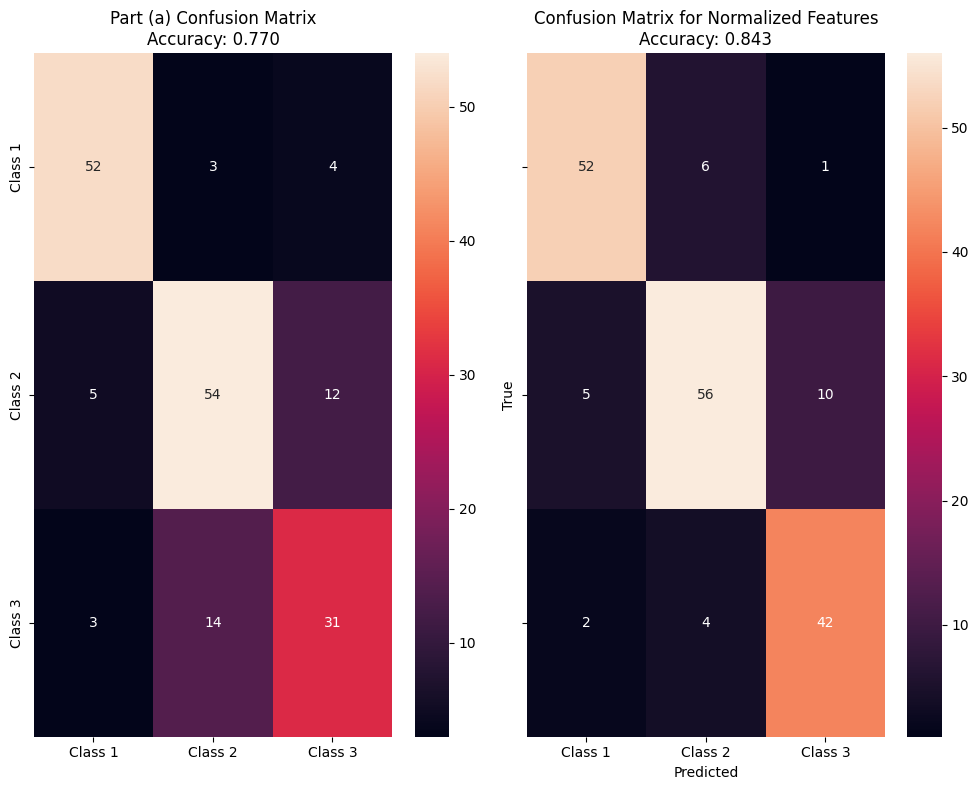

In [102]:
## normalize the features
norm_features = sklearn.preprocessing.normalize(features,norm='max')

## initalize 1-NN classifier
NN_1_n = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='euclidean')

## initalize LOOCV
loocv_n = sklearn.model_selection.LeaveOneOut()

## get predictions from cross-validation
predictions_n = sklearn.model_selection.cross_val_predict(NN_1_n, norm_features, labels, cv=loocv_n)

## estimate accuracy
accuracy_n = sklearn.metrics.accuracy_score(labels, predictions_n)
print(f'Accuracy: {accuracy:.3f}')
## get confusion matrix
cm_n = sklearn.metrics.confusion_matrix(labels, predictions_n)

## compare confusion matrices
def compare_confusion_matrix(acc, cm, acc_norm, cm_n, labels):
    fig, ax = plt.subplots(1,2,figsize=(10, 8),sharey=True)
    ax = ax.flatten()
    sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette("rocket", as_cmap=True), xticklabels=labels, yticklabels=labels, ax=ax[0])
    ax[0].set_title(f'Part (a) Confusion Matrix\nAccuracy: {acc:.3f}')
    sns.heatmap(cm_n, annot=True, fmt='d', cmap=sns.color_palette("rocket", as_cmap=True), xticklabels=labels, yticklabels=labels, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for Normalized Features\nAccuracy: {acc_norm:.3f}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

compare_confusion_matrix(accuracy, cm, accuracy_n, cm_n, wine_labels)
